In [1]:
!pip install rakun2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 725.4/725.4 KB 23.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 39.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.0/14.0 MB 80.4 MB/s eta 0:00:00
  Created wheel for rakun2: filename=rakun2-0.25-py3-none-any.whl size=933179 sha256=541d30f67c19e8d4d8977d864f13a206895042dab2f737122fcc6e5034ba54e5
  Stored in directory: /root/.cache/pip/wheels/33/6e/94/01a2453fc88240862664d0b959e2e5c215797c606a7d4b610b
Successfully built rakun2
  Attempting uninstall: Pillow
    Found existing installation: Pillow 8.4.0
    Uninstalling Pillow-8.4.0:
      Successfully uninstalled Pillow-8.4.0


In [1]:
!pip install keybert

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 KB 11.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 80.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 61.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.1/200.1 KB 23.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 102.1 MB/s eta 0:00:00
  Created wheel for keybert: filename=keybert-0.7.0-py3-none-any.whl size=23794 sha256=ced3f4bc5a0e6d4bb19b31cc08b8ec2fdeb61e4d7df95274cfe0b004bd5d5e9a
  Stored in directory: /root/.cache/pip/wheels/68/aa/41/82025d89b0eb97484c9ac7d527abf596765c41733af79f86b0
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125942 sha256=6880ba841e7f0166d505fc808429e88798ea9e430369

In [2]:
!pip install keyphrase_vectorizers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 192.1/192.1 KB 21.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 100.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 70.4 MB/s eta 0:00:00
  Attempting uninstall: transformers
    Found existing installation: transformers 4.27.4
    Uninstalling transformers-4.27.4:
      Successfully uninstalled transformers-4.27.4


In [3]:
!pip install yake


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.2/60.2 KB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 48.0 MB/s eta 0:00:00


In [4]:
import re
import os, os.path
import fnmatch
import json
import collections
import glob
import json

import matplotlib.pyplot as plt
import numpy as np
# import modules for web scrapping
import requests
from bs4 import BeautifulSoup


In [124]:
book = "Lenin_a_Political_Life"
startdate = 1700
enddate = 2020
wikilink = "https://en.wikipedia.org/wiki/Vladimir_Lenin"
titlename = "Vladimir Lenin"

In [125]:
from google.colab import files
from zipfile import ZipFile

# with ZipFile(files.upload(), 'r') as zip:
#   zip.extractall()
#   print('Done')
file_name = rf"/content/{book}.zip"

with ZipFile(file_name, 'r') as zipf:
  zipf.extractall()
  print('Done')

Done


In [126]:
from keyphrase_vectorizers import KeyphraseCountVectorizer
from keybert import KeyBERT
import yake
from rakun2 import RakunKeyphraseDetector


def get_keyword_bert(docs):
    vectorizer = KeyphraseCountVectorizer(pos_pattern= '<N.*>+')
    kw_model = KeyBERT()
    onewords = kw_model.extract_keywords(docs=docs, vectorizer=vectorizer,top_n=5,stop_words='english')
    return onewords

def get_keyword_yake(docs):
    kw_extractor = yake.KeywordExtractor(lan="en", n=3, windowsSize=3,top = 5)
    keywords = kw_extractor.extract_keywords(docs)
    return keywords

def get_keyword_rakun(docs):
  hyperparameters = {"num_keywords": 5,
                   "merge_threshold": 1.1,
                   "alpha": 0.3,
                   "token_prune_len": 3}

  keyword_detector = RakunKeyphraseDetector(hyperparameters)
  out_keywords = keyword_detector.find_keywords(docs, input_type="string")
  return out_keywords



In [127]:
dir_path = rf"/content/{book}/part"
rootdir = rf"/content/{book}/"
part = 1
mp_bert, mp_yake, mp_rakun = {}, {}, {}
for path in glob.glob(f'{rootdir}/*/**/', recursive=True):
    x = 1
    no_of_chapters = len(fnmatch.filter(os.listdir(dir_path + str(part) + '/'), '*.txt'))
    print(no_of_chapters)
    while x <= no_of_chapters:
        target_x = no_of_chapters+1
        for i in range(x,target_x):
            with open(dir_path + str(part) + '/chapter'+ str(i) + '.txt', 'r', encoding='utf-8') as content_file:
                key = str(part) + '/chapter'+ str(i)                
                content = content_file.read()
                print(key)
                mp_bert[key] = get_keyword_bert(content)
                mp_yake[key] = get_keyword_yake(content)
                mp_rakun[key] = get_keyword_rakun(content)
        x = target_x
        part += 1

10
1/chapter1
1/chapter2
1/chapter3
1/chapter4
1/chapter5
1/chapter6
1/chapter7
1/chapter8
1/chapter9
1/chapter10
10
2/chapter1
2/chapter2
2/chapter3
2/chapter4
2/chapter5
2/chapter6
2/chapter7
2/chapter8
2/chapter9
2/chapter10
10
3/chapter1
3/chapter2
3/chapter3
3/chapter4
3/chapter5
3/chapter6
3/chapter7
3/chapter8
3/chapter9
3/chapter10


In [128]:
with open(rf"mp_{book}_bert.json", "w") as outfile:
    json.dump(mp_bert, outfile)

with open(rf"mp_{book}_yake.json", "w") as outfile:
    json.dump(mp_yake, outfile)

with open(rf"mp_{book}_rakun.json", "w") as outfile:
    json.dump(mp_rakun, outfile)

In [129]:
mp_combined = {}
for k in mp_rakun.keys():
  k1 = set([v[0] for v in mp_bert[k]])
  k2 = set([v[0] for v in mp_yake[k]])
  k3 = set([v[0] for v in mp_rakun[k]])
  mp_combined[k] = k1.union(k2,k3)

# mp_combined
for k,v in mp_combined.items():
  print(len(v))

15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15


In [130]:
keyword_to_chap = collections.defaultdict(list)
for key,list_val in mp_combined.items():
    for val in list_val:
        keyword_to_chap[val].append(key)


final_keywords = set()
all_keywords = list(mp_combined.values())
for i in all_keywords:
    for val in i:
            final_keywords.add(val)
print(final_keywords)   
print(len(final_keywords))

{'bolshevik hegemony', 'Party Congress', 'Bogdanov', 'petrograd bolsheviks', 'bolshevik practicality', 'bolshevik faction', 'proletarian culture', 'kow-tow to Kaiser', 'missing is incontrovertible', 'travel to Siberia', 'Central Committee', 'bolshevik repression', 'mass organisations', 'exile in Shushenskoe', 'punished as leniently', 'tsarism', 'illegal party', 'Ulyanov', 'metal and confronted', 'penury in Switzerland', 'anti governmental', 'economic reconstruction', 'petrograd soviet', 'middle peasants', 'political commissars', 'armed forces', 'bolshevik intransigence', 'middle class', 'agrarian socialists', 'poorest peasants', 'civil war', 'Sturm und Drang', 'Plekhanov', 'major stroke', 'kazan student', 'self-assurance to listen', 'land nationalisation', 'unrest', 'Red Army', 'bolshevik opposition', 'international political', 'landed gentry', 'socialist administration', 'servants and spies', 'marxist movement', 'Poland And Lithuania', 'invited to contribute', 'petersburg marxists', '

In [131]:
def get_year_to_content():
    dir_path = rf"/content/{book}/part"
    rootdir =rf"/content/{book}/"
    date_dict = {}
    year_mode_dict = {}
    # for part in range(1,Parts+1):
    part = 1
    for path in glob.glob(f'{rootdir}/*/**/', recursive=True):
        x = 1
        #print("part:" + str(part))
        date_dict[str(part)] = {}
        year_mode_dict[str(part)] = {}
        #print(dir_path + str(part) + '/')
        no_of_chapters = len(fnmatch.filter(os.listdir(dir_path + str(part) + '/'), '*.txt'))
    #     print('no.of_chapters:' + str(no_of_chapters))
        while x <= no_of_chapters:
            target_x = no_of_chapters+1
            for i in range(x,target_x):
                #print("chapter:" + str(i))
                with open(dir_path + str(part) + '/chapter'+ str(i) + '.txt', 'r', encoding='utf-8') as content_file:
                    content = content_file.read()

                regex= "\d{4}"
                dates = re.findall(regex, content)
                mdates = []
                year_list = []
                try:
                    for date in dates:
                        if int(date) <= enddate and int(date) >= startdate:                    
                            #print date
                            year_list.append(date)
                            mdates.append(date)                       
                except:
                    pass
                date_dict[str(part)][str(i)] = mdates
                try:
                    year_mode_dict[str(part)][str(i)] = max(set(year_list), key=year_list.count)
                except:
                    year_mode_dict[str(part)][str(i)] = -1
            x = target_x
            part += 1

    # assigning chapter the date with closest chapter
    def closest(lst, K):
        if lst:
          return lst[min(range(len(lst)), key = lambda i: abs(lst[i]-K))]
        else:
          return -1


    #for part in range(1,Parts+1):
    part = 1
    for path in glob.glob(f'{rootdir}/*/**/', recursive=True):
        x = 1
        # checking which chapters has date assigned
        no_of_chapters = len(fnmatch.filter(os.listdir(dir_path + str(part) + '/'), '*.txt'))
        chapters_with_date = []
        while x <= no_of_chapters:
            target_x = no_of_chapters+1
            for i in range(x,target_x):
                # print("chapter:" + str(i))
                if year_mode_dict[str(part)][str(i)] != -1:
                    chapters_with_date.append(i)
            x = target_x
        x = 1
        # assigning date to chapter which is closest to it
        while x <= no_of_chapters:
            target_x = no_of_chapters+1
            for i in range(x,target_x):
                #print("chapter:" + str(i))
                k = closest(chapters_with_date,i)
                #print("K:",k)
                year_mode_dict[str(part)][str(i)] = year_mode_dict[str(part)][str(k)]
            x = target_x
        part += 1

    year_to_chap = collections.defaultdict(list)  # year -> list of folder paths
    for key in year_mode_dict.keys():
        folder = f"{key}"
        for k2 in year_mode_dict[key].keys():
            file = folder
            file += f"/chapter{k2}"
            val = year_mode_dict[key][k2]
            year_to_chap[val].append(file)

    return year_to_chap

year_to_chap = get_year_to_content()

keys = []
for k in list(keyword_to_chap.keys()):
    keys.append(k.title().replace(" ", "_"))
keyword_to_chap2 = dict(zip(keys, list(keyword_to_chap.values())))

# year_to_chap
chap_to_year = {}
for k,v in year_to_chap.items():
    for l in v:
        chap_to_year[l]= int(k)
# chap_to_year
keyword_to_year = collections.defaultdict(set)
for k,v in keyword_to_chap.items():
    for l in v:
        keyword_to_year[k.title().replace(" ", "_")].add(chap_to_year[l])
# print(keyword_to_year)

key_yr_chap_mp = collections.defaultdict(list)
for k,v in keyword_to_chap2.items():
    for chap in v:
        key_yr_chap_mp[k+'_'+str(chap_to_year[chap])].append(chap)
print(key_yr_chap_mp)

defaultdict(<class 'list'>, {'Opposition_Confront_Difficulties_1904': ['1/chapter1'], 'Social_Democrats_1904': ['1/chapter1'], 'Social_Democrats_1905': ['1/chapter2', '1/chapter3'], 'Social_Democrats_1907': ['1/chapter4'], 'Social_Democrats_1909': ['1/chapter5'], 'Social_Democrats_1899': ['1/chapter9'], 'Social_Democrats_1902': ['1/chapter10'], 'Social_Democrats_1915': ['2/chapter1'], 'Social_Democrats_1910': ['2/chapter4'], 'Social_Democrats_1917': ['2/chapter7'], 'Social_Democrats_1913': ['2/chapter9'], 'Social_Democrats_1914': ['2/chapter10'], 'Reprimand_To_Deliver_1904': ['1/chapter1'], 'Party_1904': ['1/chapter1'], 'Party_1905': ['1/chapter2'], 'Party_1907': ['1/chapter4'], 'Party_1902': ['1/chapter10'], 'Oppositions_1904': ['1/chapter1'], 'Middle_Class_1904': ['1/chapter1'], 'Middle_Class_1870': ['1/chapter6'], 'Middle_Class_1890': ['1/chapter7'], 'Middle_Class_1902': ['1/chapter10'], 'Democratic_Activists_1904': ['1/chapter1'], 'Social_Democratic_1904': ['1/chapter1'], 'Social_D

In [132]:
from sentence_transformers import SentenceTransformer, util
import torch

embedder = SentenceTransformer('all-MiniLM-L6-v2')

def create_representative_doc(corpus,query):
    corpus_embeddings = embedder.encode(corpus, convert_to_tensor=True)
    query_embedding = embedder.encode(query, convert_to_tensor=True)
    
    cos_scores = util.cos_sim(query_embedding, corpus_embeddings)[0]
    paragraph = ""
    for i,score in enumerate(cos_scores):
        if score >0.40:
            paragraph += (corpus[i]+'.')

    return paragraph

In [133]:
key_yr_chap_mp

defaultdict(list,
            {'Opposition_Confront_Difficulties_1904': ['1/chapter1'],
             'Social_Democrats_1904': ['1/chapter1'],
             'Social_Democrats_1905': ['1/chapter2', '1/chapter3'],
             'Social_Democrats_1907': ['1/chapter4'],
             'Social_Democrats_1909': ['1/chapter5'],
             'Social_Democrats_1899': ['1/chapter9'],
             'Social_Democrats_1902': ['1/chapter10'],
             'Social_Democrats_1915': ['2/chapter1'],
             'Social_Democrats_1910': ['2/chapter4'],
             'Social_Democrats_1917': ['2/chapter7'],
             'Social_Democrats_1913': ['2/chapter9'],
             'Social_Democrats_1914': ['2/chapter10'],
             'Reprimand_To_Deliver_1904': ['1/chapter1'],
             'Party_1904': ['1/chapter1'],
             'Party_1905': ['1/chapter2'],
             'Party_1907': ['1/chapter4'],
             'Party_1902': ['1/chapter10'],
             'Oppositions_1904': ['1/chapter1'],
             'Middle_C

In [134]:
def split_sentence_from_text(key):
    file_loc = rf"/content/{book}/part%s.txt"%key
    text = ""
    with open(file_loc,encoding="utf8") as f:
        text = f.read()

    res = re.findall(r"[^.!?]+", text)
    return res

mp_key_doc = {}
for key,val in key_yr_chap_mp.items():
    mp_key_doc[key] = ""
    print(f"{key}")
    for k in val:
        corpus = split_sentence_from_text(k)
#         doc = create_representative_doc(corpus,key)
        mp_key_doc[key] += create_representative_doc(corpus,key)

# print(mp_key_doc)

Opposition_Confront_Difficulties_1904
Social_Democrats_1904
Social_Democrats_1905
Social_Democrats_1907
Social_Democrats_1909
Social_Democrats_1899
Social_Democrats_1902
Social_Democrats_1915
Social_Democrats_1910
Social_Democrats_1917
Social_Democrats_1913
Social_Democrats_1914
Reprimand_To_Deliver_1904
Party_1904
Party_1905
Party_1907
Party_1902
Oppositions_1904
Middle_Class_1904
Middle_Class_1870
Middle_Class_1890
Middle_Class_1902
Democratic_Activists_1904
Social_Democratic_1904
Social_Democratic_1905
Social_Democratic_1907
Social_Democratic_1909
Social_Democratic_1899
Social_Democratic_1902
Social_Democratic_1915
Social_Democratic_1910
Social_Democratic_1914
Party_Apparatus_1904
Party_Apparatus_1918
Lenin_1909
Lenin_1899
Lenin_1910
Lenin_1917
Lenin_1921
Lenin_1918
Lenin_1923
Party_Relations_1904
Political_Tasks_1904
Party_Structure_1904
Starting_To_Defer_1904
Central_Committee_1910
Bolsheviks_1905
Bolsheviks_1907
Bolsheviks_1917
Bolsheviks_1914
Bolsheviks_1919
Bolsheviks_1920
Bols

In [135]:
with open(rf"mp_key_doc_{book}.json", "w") as outfile:
    json.dump(mp_key_doc, outfile)

In [136]:
url = wikilink
headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.102 Safari/537.36'}
response = requests.get(url, headers=headers)
#print(response.status_code)
soup = BeautifulSoup(response.content, 'html.parser')

desired_ids = []
for link in soup.find_all('span', attrs={'class':'mw-headline'}):
    if link.get('id') is not None: 
        desired_ids.append(link.get('id'))
print(desired_ids)

def FetchParagraphBetweenIds(id1,id2):
    hElem = soup.find("span", {'id': id1})
    endElem = soup.find('span', {'id': id2})
    cntns = list(soup.find_all())

    my_lst = []
    inBetween = False
    for tag in cntns:
        if tag == hElem:
            inBetween = True
        if inBetween == True and tag.name == 'p':
            my_lst.append(tag.get_text())
        if tag == endElem:
            inBetween = False
            break
    return "".join(my_lst)

id_to_paragraph = {}
for i in range(len(desired_ids)-1):
    id_to_paragraph[desired_ids[i]] = FetchParagraphBetweenIds(desired_ids[i],desired_ids[i+1])

['Early_life', 'Childhood:_1870–1887', 'University_and_political_radicalisation:_1887–1893', 'Revolutionary_activity', 'Early_activism_and_imprisonment:_1893–1900', 'Munich,_London,_and_Geneva:_1900–1905', 'Revolution_of_1905_and_its_aftermath:_1905–1914', 'First_World_War:_1914–1917', 'February_Revolution_and_the_July_Days:_1917', 'October_Revolution:_1917', "Lenin's_government", 'Organising_the_Soviet_government:_1917–1918', 'Social,_legal,_and_economic_reform:_1917–1918', 'Treaty_of_Brest-Litovsk:_1917–1918', 'Anti-Kulak_campaigns,_Cheka,_and_Red_Terror:_1918–1922', 'Civil_War_and_the_Polish–Soviet_War:_1918–1920', 'Comintern_and_world_revolution:_1919–1920', 'Famine_and_the_New_Economic_Policy:_1920–1922', 'Declining_health_and_conflict_with_Stalin:_1920–1923', 'Death_and_funeral:_1923–1924', 'Political_ideology', 'Marxism_and_Leninism', 'Democracy_and_the_national_question', 'Personal_life_and_characteristics', 'Legacy', 'Within_the_Soviet_Union', 'In_the_international_communist_m

In [137]:
from sentence_transformers import SentenceTransformer, util
import torch

mp_sim_score = {}
embedder = SentenceTransformer('all-MiniLM-L6-v2')

for key1, val1 in id_to_paragraph.items():
    for key2,val2 in mp_key_doc.items():
        if val1 != '' and val2 != '':
            corpus_embeddings = embedder.encode(val1, convert_to_tensor=True)
            query_embedding = embedder.encode(val2, convert_to_tensor=True)
            cos_scores = util.cos_sim(query_embedding, corpus_embeddings)[0][0]
            mp_sim_score[str(key1)+'->'+str(key2)] = cos_scores
            # print(f"{key1} {key2} {cos_scores}")

In [138]:
mp_sim_score = {k: v.item() for k, v in mp_sim_score.items()}

with open(rf"mp_sim_score_{book}.json", "w") as outfile:
    json.dump(mp_sim_score, outfile)

In [139]:
import json
with open(f"mp_sim_score_{book}.json") as outfile:
    mp_sim_score = json.load(outfile)

In [140]:
def display_bar_plot(dict_t,title,xlab,ylab):
    plt.figure(figsize=(10,7))
    plt.bar(*zip(*dict_t.items()))
    plt.title(title)
    # plt.grid()
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    plt.show()

In [141]:
mp_sim_score_bar_range = {}
a,b,c,d,e = 0,0,0,0,0
for k,v in mp_sim_score.items():
    if v<0:
        a += 1
    elif v>=0 and v<0.25:
        b+= 1
    elif v>=0.25 and v<0.5:
        c += 1
    elif v>=0.5 and v<0.75:
        d += 1
    elif v>= 0.75:
        e += 1
mp_sim_score_bar_range["<0"] = a
mp_sim_score_bar_range["0-0.25"] = b
mp_sim_score_bar_range["0.25-0.5"] = c
mp_sim_score_bar_range["0.5-0.75"] = d
mp_sim_score_bar_range["0.75-1"] = e


# display_bar_plot(mp_sim_score_bar_range,rf"similarity distribution for {book}","similarity","count")

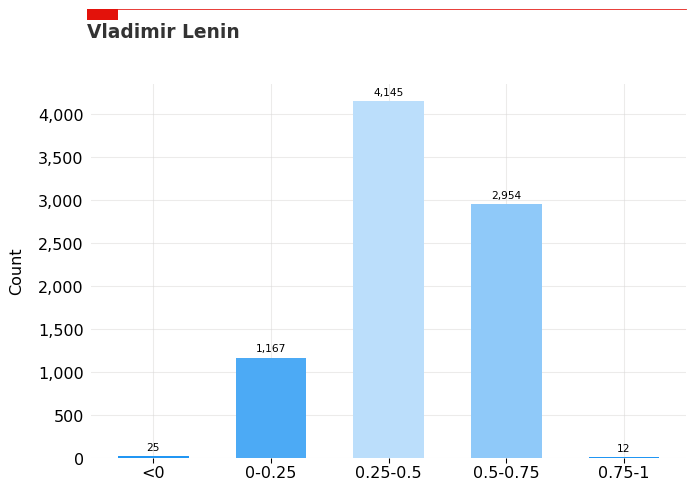

In [142]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.ticker import MaxNLocator

# Create the figure and axes objects, specify the size and the dots per inches
# delay_by_month['Month'], delay_by_month['ArrDelay'] ->  
# list(mp_sim_score_bar_range.keys()), list(mp_sim_score_bar_range.values())

fig, ax = plt.subplots(figsize=(8,6), dpi = 96)

# Plot bars
bar1 = ax.bar(list(mp_sim_score_bar_range.keys()), list(mp_sim_score_bar_range.values()),width=0.6)
# Create the grid 
ax.grid(which="major", axis='x', color='#DAD8D7', alpha=0.5, zorder=1)
ax.grid(which="major", axis='y', color='#DAD8D7', alpha=0.5, zorder=1)

# Reformat x-axis label and tick labels
ax.set_xlabel('', fontsize=12, labelpad=10) # No need for an axis label
ax.xaxis.set_label_position("bottom")
ax.xaxis.set_major_formatter(lambda s, i : f'{s:,.0f}')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.xaxis.set_tick_params(pad=2, labelbottom=True, bottom=True, labelsize=12, labelrotation=0)
labels = list(mp_sim_score_bar_range.keys())
ax.set_xticks(list(mp_sim_score_bar_range.keys()), labels) # Map integers numbers from the series to labels list

# Reformat y-axis
ax.set_ylabel('Count', fontsize=12, labelpad=10)
ax.yaxis.set_label_position("left")
ax.yaxis.set_major_formatter(lambda s, i : f'{s:,.0f}')
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
ax.yaxis.set_tick_params(pad=2, labeltop=False, labelbottom=True, bottom=False, labelsize=12)

# Add label on top of each bar
ax.bar_label(bar1, labels=[f'{e:,.0f}' for e in list(mp_sim_score_bar_range.values())], padding=3, color='black', fontsize=8) 

# Remove the spines
ax.spines[['top','left','right','bottom']].set_visible(False)

# Make the left spine thicker
ax.spines['right'].set_linewidth(1.1)

# Add in red line and rectangle on top
ax.plot([0.12, .9], [.98, .98], transform=fig.transFigure, clip_on=False, color='#E3120B', linewidth=.6)
ax.add_patch(plt.Rectangle((0.12,.98), 0.04, -0.02, facecolor='#E3120B', transform=fig.transFigure, clip_on=False, linewidth = 0))

# Add in title and subtitle
ax.text(x=0.12, y=.93, s=titlename, transform=fig.transFigure, ha='left', fontsize=14, weight='bold', alpha=.8)
# ax.text(x=0.12, y=.90, s="between Wikipedia section content and Keyword focused paragraph", transform=fig.transFigure, ha='left', fontsize=12, alpha=.8)

# Set source text
# ax.text(x=0.1, y=0.12, s="Mahatma Gandhi", transform=fig.transFigure, ha='left', fontsize=10, alpha=.7)

# Adjust the margins around the plot area
plt.subplots_adjust(left=None, bottom=0.2, right=None, top=0.85, wspace=None, hspace=None)

# Set a white background
fig.patch.set_facecolor('white')

# Colours - Choose the extreme colours of the colour map
colours = ["#2196f3", "#bbdefb"]

# Colormap - Build the colour maps
cmap = mpl.colors.LinearSegmentedColormap.from_list("colour_map", colours, N=256)
norm = mpl.colors.Normalize(min(list(mp_sim_score_bar_range.values())), max(list(mp_sim_score_bar_range.values()))) # linearly normalizes data into the [0.0, 1.0] interval

# Plot bars
bar1 = ax.bar(list(mp_sim_score_bar_range.keys()), list(mp_sim_score_bar_range.values()), color=cmap(norm(list(mp_sim_score_bar_range.values()))), width=0.6, zorder=2)
fig.savefig(f"similarity_distribution_{book}.png")

In [143]:
from statistics import median
def fetch_single_date_from_content(content):
    regex= "\d{4}"
    dates = re.findall(regex, content)
    year_list = []
    res = -1
    try:
        for date in dates:
            if int(date) <= enddate and int(date) >= startdate:                    
                #print date
                year_list.append(int(date))
    except:
        pass
    if year_list:
        # res = max(set(year_list), key=year_list.count)
        res = median(year_list)
    return int(res)
    
wiki_section_date = {}
for k,v in id_to_paragraph.items():
#     print(fetch_dates_from_content(v))
    wiki_section_date[k] = fetch_single_date_from_content(v)
print(wiki_section_date)

{'Early_life': -1, 'Childhood:_1870–1887': 1870, 'University_and_political_radicalisation:_1887–1893': 1867, 'Revolutionary_activity': -1, 'Early_activism_and_imprisonment:_1893–1900': 1896, 'Munich,_London,_and_Geneva:_1900–1905': 1902, 'Revolution_of_1905_and_its_aftermath:_1905–1914': 1907, 'First_World_War:_1914–1917': 1916, 'February_Revolution_and_the_July_Days:_1917': 1917, 'October_Revolution:_1917': 1917, "Lenin's_government": -1, 'Organising_the_Soviet_government:_1917–1918': 1918, 'Social,_legal,_and_economic_reform:_1917–1918': 1918, 'Treaty_of_Brest-Litovsk:_1917–1918': 1918, 'Anti-Kulak_campaigns,_Cheka,_and_Red_Terror:_1918–1922': 1918, 'Civil_War_and_the_Polish–Soviet_War:_1918–1920': 1919, 'Comintern_and_world_revolution:_1919–1920': 1919, 'Famine_and_the_New_Economic_Policy:_1920–1922': 1921, 'Declining_health_and_conflict_with_Stalin:_1920–1923': 1922, 'Death_and_funeral:_1923–1924': 1933, 'Political_ideology': -1, 'Marxism_and_Leninism': 1915, 'Democracy_and_the_nat

In [144]:
# keeping a threshold
mp_sim_score_50 = {}
for key,val in mp_sim_score.items():
    if val >= 0.30:
        mp_sim_score_50[key] = val

        
# section wise hyperlink
section_wise_keyword = collections.defaultdict(set)
for k,v in mp_sim_score_50.items():
    section_name, keyword = k.split('->')[0],k.split('->')[1]
    section_wise_keyword[section_name].add(keyword.title().replace(" ", "_"))
    
# section_wise_keyword
mixed_sim_score = {}
date_diff = 0
for k,v in section_wise_keyword.items():
    for elem in v:
        key = k+'->'+elem
        d_k = int(elem[elem.rindex('_')+1:])
        d_w = wiki_section_date[k]
#         print(f"{d_k}    {d_w}")
        if d_w == -1: date_diff = enddate-startdate
        else: date_diff = abs(d_k-d_w)+1
        date_score = 1/date_diff
        sim_score = mp_sim_score_50[key]
        rank = 0.5*date_score + 0.5*sim_score
        mixed_sim_score[key] = rank

## Keyword Filteration 1

In [145]:
section_wise_keyword_filtered = collections.defaultdict(list)
for k,v in mixed_sim_score.items():
    section_name, keyword = k.split('->')[0],k.split('->')[1]
    section_wise_keyword_filtered[section_name].append((keyword.title().replace(" ", "_"),v))

final_kw = set()

for k,v in section_wise_keyword_filtered.items():
  for ele in v:
    final_kw.add(ele[0])
# print(final_kw)
print(len(final_kw))

# initialization
kw_max_score = {}
for k in final_kw:
  kw_max_score[k] = 0

for k,v in section_wise_keyword_filtered.items():
  for ele in v:
    kw_max_score[ele[0]] = max(kw_max_score[ele[0]], ele[1])
# print(kw_max_score)


349


In [146]:
for k,v in section_wise_keyword_filtered.items():
  print(f"{k}   ->  {len(v)}")

Childhood:_1870–1887   ->  86
University_and_political_radicalisation:_1887–1893   ->  292
Early_activism_and_imprisonment:_1893–1900   ->  303
Munich,_London,_and_Geneva:_1900–1905   ->  299
Revolution_of_1905_and_its_aftermath:_1905–1914   ->  313
First_World_War:_1914–1917   ->  300
February_Revolution_and_the_July_Days:_1917   ->  300
October_Revolution:_1917   ->  307
Organising_the_Soviet_government:_1917–1918   ->  300
Social,_legal,_and_economic_reform:_1917–1918   ->  306
Treaty_of_Brest-Litovsk:_1917–1918   ->  291
Anti-Kulak_campaigns,_Cheka,_and_Red_Terror:_1918–1922   ->  312
Civil_War_and_the_Polish–Soviet_War:_1918–1920   ->  289
Comintern_and_world_revolution:_1919–1920   ->  309
Famine_and_the_New_Economic_Policy:_1920–1922   ->  320
Declining_health_and_conflict_with_Stalin:_1920–1923   ->  290
Death_and_funeral:_1923–1924   ->  268
Marxism_and_Leninism   ->  300
Democracy_and_the_national_question   ->  286
Personal_life_and_characteristics   ->  269
Legacy   ->  290

In [147]:
mp_final_kw = collections.defaultdict(list)
for k,v in section_wise_keyword_filtered.items():
  mp = {}
  for ele in v:
    mp[ele[0]] = ele[1]
  for ele in v:
    if mp[ele[0]] == kw_max_score[ele[0]]:
      mp_final_kw[k].append(ele)

# mp1 = {}
# for k,v in mp_final_kw.items():
#   mp1[k] = len(v)
#   # print(f"{k}   ->  {len(v)}")

# print(mp1)

In [148]:
# section_wise_keyword_filtered
section_wise_keyword_sort =  collections.defaultdict(list)
for k ,v in mp_final_kw.items():
    if len(v)>=5:
        section_wise_keyword_sort[k] = sorted(v,key = lambda x:x[1],reverse = True)[:5]
    else:
        section_wise_keyword_sort[k] = sorted(v,key = lambda x:x[1],reverse = True)
        
section_wise_keyword_sort_only = collections.defaultdict(list)
for k,v in section_wise_keyword_sort.items():
    section_wise_keyword_sort_only[k] = [ele[0] for ele in v]
    
for k,v in section_wise_keyword_sort_only.items():
    print(f"{k}  ->   {v}")
mp1 = {}
for k,v in section_wise_keyword_sort_only.items():
  mp1[k] = len(v)
  # print(f"{k}   ->  {len(v)}")

print(mp1)

Childhood:_1870–1887  ->   ['Vladimir_Ulyanov_1870', 'Vladimir_Ilich_Ulyanov_1870', 'Vladimir_Ilich_1870', 'Young_Vladimir_1870', 'Vladimir_1870']
University_and_political_radicalisation:_1887–1893  ->   ['Russian_Marxism_1890', 'Moscow_University_1890', 'Agrarian_Socialists_1870', 'Kazan_Student_1890', 'Kazan_Demonstration_1890']
Early_activism_and_imprisonment:_1893–1900  ->   ['Labour_Movement_1895', 'Petersburg_Organisation_1895', 'Labour_Discontent_1895', 'Petersburg_Marxists_1895', 'Capitalist_Development_1895']
Munich,_London,_and_Geneva:_1900–1905  ->   ['Marxists_1902', 'Russian_Marxists_1902', 'Russian_Marxism_1902', 'Marxist_Perspective_1902', 'Marxist_Movement_1902']
Revolution_of_1905_and_its_aftermath:_1905–1914  ->   ['Bolshevik_Faction_1907', 'Bolshevik_Duplicity_1907', 'Bolsheviks_1907', 'Bolshevik_Leaders_1907', 'Social_Democratic_1907']
First_World_War:_1914–1917  ->   ['War_1914', 'Revolutionary_Situation_1914', 'Wartime_1915', 'Russian_1914', 'Opposites_In_Order_19

In [149]:
# top_mp_final_kw = collections.defaultdict(list)
# for k,v in mp_final_kw.items():
#   for ele in v:
#     if ele[1]>0.50:
#       print(ele)
#       top_mp_final_kw[k].append(ele)

# mp1 = {}
# for k,v in top_mp_final_kw.items():
#   mp1[k] = len(v)

# print(mp1)

In [150]:
# for k,v in section_wise_keyword_filtered.items():
#   mp = {}
#   for ele in v:
#     mp[ele[0]] = ele[1]

#   for ele in v:
#     if mp[ele[0]]  != kw_max_score[ele[0]]:
#       section_wise_keyword_filtered[k].remove(ele)

# for k,v in section_wise_keyword_filtered.items():
#   print(f"{k}   ->  {len(v)}")

In [151]:
with open(rf"filtered_kw_{book}.json", "w") as outfile:
    json.dump(mp_final_kw, outfile)

In [152]:
def kw_2_nrml(s1):
  temp = s1[:s1.rindex('_')]
  a = temp.split('_')
  # for i,v in enumerate(a):
  #     a[i] = v.lower()
      
  val = " ".join(a)
  return val
  
def find_freq(key,txt):
    reg = f"(?i){key}"
    return len(re.findall(rf"(?i){key}", txt))

temp = []
multitimekws = []
for k in final_kw:
  temp.append(kw_2_nrml(k))

mp = collections.Counter(temp)
for k,v in mp.items():
  if v>1:
    multitimekws.append(k)

print(multitimekws)
print(len(multitimekws))

section_to_num = {}  # this dict will store num of keywords which are present in keywords as a simple text
for k,v in section_wise_keyword_sort.items():
  cnt = set()
  for ele in v:
    temp = kw_2_nrml(ele[0])
    if find_freq(temp,id_to_paragraph[k])>0: #and temp not in multitimekws:
      cnt.add(temp)
  section_to_num[k] = cnt

mp2 = {}
for k,v in section_to_num.items():
  mp2[k] = len(v)

print(mp2)

['Bolsheviks', 'Tsarism', 'Provisional Revolutionary', 'Party Leadership', 'Ulyanov', 'Bolshevik Leaders', 'Marxists', 'Party Apparatus', 'Bolshevik Leadership', 'Social Democrats', 'Lenin', 'Party', 'Revolutionary Government', 'Russian Social-Democratic Labour', 'Political Life Lenin', 'Russian', 'Bolshevik Rule', 'Social-Democratic Labour Party', 'Socialist Revolution', 'Socialist Revolutions', 'Eighth Party Congress', 'Proletarian Culture', 'Bolshevik Party', 'Bolshevik Opposition', 'Social Democratic', 'Happened To Belong', 'Trade Unions', 'Bolshevik Faction', 'Bolshevik', 'Central Party', 'National Question', 'Bolshevik Central Committee', 'Russian Marxism', 'Separate Peace', 'Capitalist Development', 'Comrade Lenin', 'Russian Marxists', 'Bolshevik Strategy', 'Bolshevik Policy', 'Labour Movement', 'Nineteenth Century', 'Grain Requisitioning', 'Dictatorship', 'Bolshevik Hegemony', 'Stalin', 'Middle Class']
46
{'Childhood:_1870–1887': 1, 'University_and_political_radicalisation:_188

In [153]:
print(sum(list(mp2.values())))

16


In [154]:
def FetchURLSBetweenIds(id1,id2):
    hElem = soup.find("span", {'id': id1})
    endElem = soup.find('span', {'id': id2})
    cntns = list(soup.find_all())
    linkToScrape = []
    inBetween = False
    for tag in cntns:
        if tag == hElem:
            inBetween = True
        if inBetween == True and tag.name == 'p':
#             my_lst.append(tag.get_text())
            allLinks = tag.find_all('a')
            
            for link in allLinks:
                if link.get('href') is not None and link.get('href').find("/wiki/")== 0: 
                    linkToScrape.append(link['href'].replace('/wiki/',""))
        if tag == endElem:
            inBetween = False
            break
    return set(linkToScrape)

mp_urls_section_mp  = {}
for i in range(len(desired_ids)-1):
    mp_urls_section_mp[desired_ids[i]] = FetchURLSBetweenIds(desired_ids[i],desired_ids[i+1])

# print(mp_urls_section_mp)

sec_2_common_link = {}
for k,v in section_wise_keyword_sort.items():
  couldbelinks = set()
  for ele in v:
    s1 = ele[0]
    couldbelinks.add(s1[:s1.rindex('_')])
  sec_2_common_link[k] = mp_urls_section_mp[k].intersection(couldbelinks)

print(sec_2_common_link)
# print(sum(list(sec_2_common_link.values())))
mp3 = {}
for k,v in sec_2_common_link.items():
  mp3[k] = len(v)

print(mp3)
print(sum(list(mp3.values())))

{'Childhood:_1870–1887': set(), 'University_and_political_radicalisation:_1887–1893': set(), 'Early_activism_and_imprisonment:_1893–1900': set(), 'Munich,_London,_and_Geneva:_1900–1905': set(), 'Revolution_of_1905_and_its_aftermath:_1905–1914': set(), 'First_World_War:_1914–1917': set(), 'February_Revolution_and_the_July_Days:_1917': set(), 'October_Revolution:_1917': set(), 'Organising_the_Soviet_government:_1917–1918': set(), 'Social,_legal,_and_economic_reform:_1917–1918': set(), 'Treaty_of_Brest-Litovsk:_1917–1918': set(), 'Anti-Kulak_campaigns,_Cheka,_and_Red_Terror:_1918–1922': set(), 'Civil_War_and_the_Polish–Soviet_War:_1918–1920': set(), 'Comintern_and_world_revolution:_1919–1920': set(), 'Famine_and_the_New_Economic_Policy:_1920–1922': set(), 'Declining_health_and_conflict_with_Stalin:_1920–1923': set(), 'Marxism_and_Leninism': set(), 'Legacy': set()}
{'Childhood:_1870–1887': 0, 'University_and_political_radicalisation:_1887–1893': 0, 'Early_activism_and_imprisonment:_1893–19

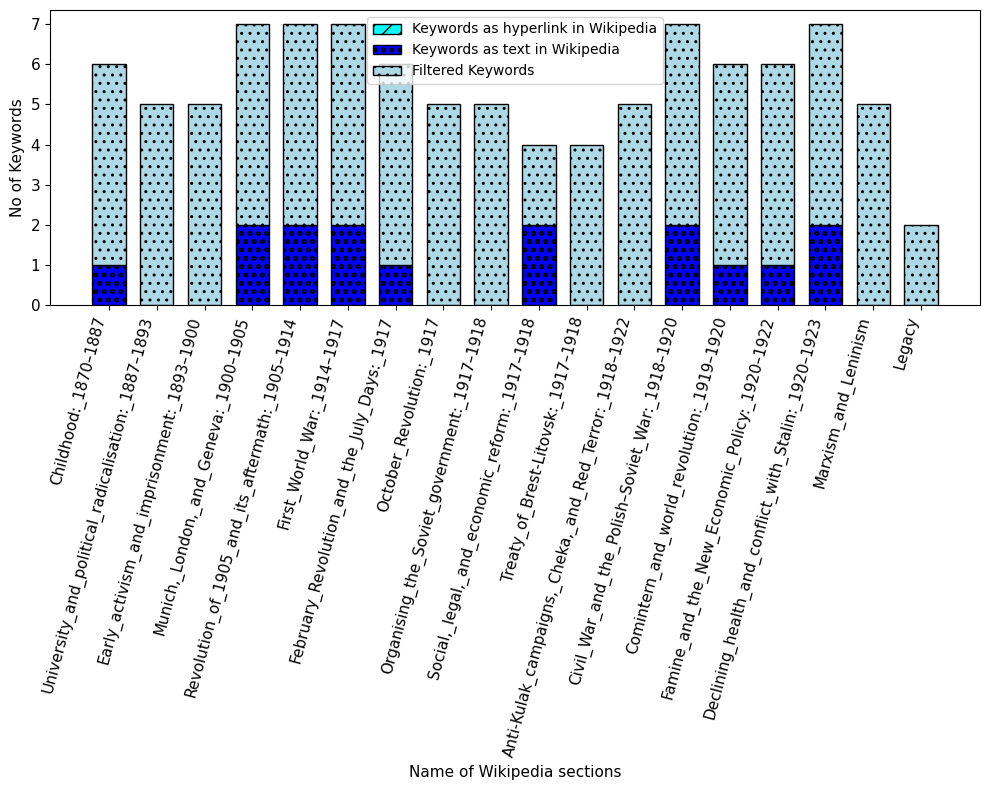

In [155]:
#Plot has been done for the tag has greater than 1 value
from matplotlib import pyplot as plt
fig = plt.figure(figsize = (10, 8))

x = list(mp3.keys())
y1 = list(mp3.values())
y2 = list(mp2.values())
y3 = list(mp1.values())

plt.bar(x, y1, width=0.7, color ='#00FFFF', hatch= "//", edgecolor = "black")
plt.bar(x, y2, bottom=y1, width=0.7, color ='blue', hatch= "oo", edgecolor = "black")
plt.bar(x, y3, bottom=y2, width=0.7, color ='lightblue', hatch= "..", edgecolor = "black")

plt.xlabel("Name of Wikipedia sections", fontsize=11, y= -0.1)
#plt.ylabel("Ratio of the duplicate question\n to the all question associated\n with the particular tag", fontsize=14)
plt.ylabel("No of Keywords", fontsize=11)
#plt.title("Students enrolled in different courses")
plt.xticks(rotation=75, fontsize=11, ha="right")
plt.yticks(fontsize=11)
plt.legend(["Keywords as hyperlink in Wikipedia", "Keywords as text in Wikipedia", "Filtered Keywords"])

#plt.show()
plt.tight_layout()
plt.savefig(f"kw_dist_wiki_sec_{book}.png")

# Wikipedia Page Creation
I am targeting the keywords which are present in wikipedia as a text but no hyperlinks are present and timed keywords that are present in different wikipedia section but in different year

In [156]:
final_keywords = set()
for k,v in section_wise_keyword_sort_only.items():
    for s1 in v:
        final_keywords.add(s1[:s1.rindex('_')])
# key_yr_chap_mp
print(final_keywords)

{'Draft_Manifesto', 'Bolsheviks', 'Skating_Or_Gamebird', 'Prominent_In_Ushering', 'Russian_Marxists', 'Kow-Tow_To_Kaiser', 'Bolshevik_Party', 'Social_Democratic', 'Fail_To_Oppose', 'Labour_Movement', 'Bolshevik_Regime', 'Labour_Discontent', 'Revolutionary_Situation', 'Petersburg_Marxists', 'War', 'Russian_Marxism', 'Vladimir_Ulyanov', 'Bolshevik_Central_Committee_Policies', 'Lenin', 'Social_Democrats', 'Intend_To_Accede', 'Food_Supplies', 'Marxists', 'World_War', 'Bolshevik_Power', 'Bolshevik_Central_Committee', 'Bolshevik_Leaders', 'Bolshevik_Hegemony', 'Marxist_Movement', 'Unrest', 'Kazan_Demonstration', 'Agrarian_Socialists', 'Petersburg_Organisation', 'Bolshevik_Intransigence', 'Socialism', 'Stalin', 'Official_Socialist', 'Moscow_University', 'Bolshevik_Rule', 'Bolshevik_Position', 'Civil_War', 'Bolshevik_Opposition', 'Bolshevik_Duplicity', 'National_Question', 'Eighth_Party_Congress', 'Red_Army', 'Central_Party', 'Vladimir_Ilich_Ulyanov', 'Wartime', 'Happened_To_Belong', 'Bolshevi

In [157]:
allLinks = soup.find(id="bodyContent").find_all("a")
linkToScrape = []
for link in allLinks:
    if link.get('href') is not None and link.get('href').find("/wiki/")== 0: 
        linkToScrape.append(link)

print(len(linkToScrape))
# print the urls of linkToScrape
# https://en.wikipedia.org/wiki/Nationalism#Anti-colonial_nationalism
# url = "https://en.wikipedia.org"
urls = set()
for link in linkToScrape:
    urls.add(link['href'].replace('/wiki/',""))
print(urls)
     

2473
{'Special:BookSources/978-0300198324', 'Hans-Hermann_Hoppe', 'Marhaenism', 'Wikipedia:The_Wikipedia_Library', 'Hal_Draper', 'Free_association_(Marxism_and_anarchism)', 'Alexandre_Auguste_Ledru-Rollin', 'John_Goodwyn_Barmby', 'Consensus_theory', 'Communism_in_Poland', 'C._L._R._James', 'Communism_in_the_Philippines', 'Category:Pages_using_Sister_project_links_with_wikidata_mismatch', 'Orgburo_of_the_8th_Congress_of_the_Russian_Communist_Party_(Bolsheviks)', 'Mozi', 'Premier_of_the_Soviet_Union', 'Template_talk:Leaders_of_the_Ruling_Parties_of_the_Eastern_Bloc', 'Fyodor_Lukoyanov', 'Soyuz_(faction)', 'Social_Darwinism', 'Max_Weber', 'Secretariat_of_the_17th_Congress_of_the_All-Union_Communist_Party_(Bolsheviks)', 'Category:Russian_people_of_Swedish_descent', 'Andrey_Belousov', 'Communism_in_Peru', 'Unitary_state', 'Barracks_communism', 'K%C3%A1roly_Gr%C3%B3sz', 'Tampere_Lenin_Museum', '21st-century_communist_theorists', 'Category:People_from_Simbirsky_Uyezd', 'Immanuel_Kant', 'The_R

In [158]:
hyperlinks_present = final_keywords & set(urls)
print(hyperlinks_present)
len(hyperlinks_present)

{'Bolsheviks', 'Red_Army', 'Socialism'}


3

In [159]:
final_keywords = set()
for k,v in section_wise_keyword_sort_only.items():
    for s1 in v:
        final_keywords.add(s1)
#         final_keywords.add(s1[:s1.rindex('_')])
# key_yr_chap_mp
print(final_keywords)

{'Bolsheviks_1919', 'Bolshevik_Rule_1921', 'Bolshevik_Central_Committee_Policies_1917', 'Bolshevik_Opposition_1922', 'Agrarian_Socialists_1870', 'Revolutionary_Situation_1914', 'Eighth_Party_Congress_1919', 'Middle_Peasants_1918', 'Wartime_1915', 'Russian_Marxists_1902', 'Bolshevik_Opposition_1919', 'Opposites_In_Order_1914', 'Marxists_1902', 'Party_Apparatus_1918', 'Bolshevik_Rule_1919', 'Bolshevik_Duplicity_1907', 'Bolshevik_Rule_1918', 'Petersburg_Organisation_1895', 'Happened_To_Belong_1917', 'Socialist_Revolution_1919', 'Kazan_Demonstration_1890', 'Marxist_Perspective_1902', 'Bolshevik_Position_1918', 'Bolshevik_Faction_1907', 'Vladimir_Ilich_1870', 'Petersburg_Marxists_1895', 'Red_Army_1919', 'Bolshevik_Hegemony_1917', 'Bolshevik_Faction_1922', 'Central_Party_1919', 'Lenin_1918', 'Skating_Or_Gamebird_1895', 'Civil_War_1917', 'Bolshevik_Practicality_1918', 'Bolshevik_Demands_1918', 'Lenin_1921', 'Social_Democrats_1915', 'Socialism_1918', 'Bolshevik_Regime_1921', 'Requisitioning_Ca

In [160]:
keyword_to_chap_final = {}
for k,v in key_yr_chap_mp.items():
    if k in final_keywords:
        keyword_to_chap_final[k] = v
print(keyword_to_chap_final)

{'Social_Democrats_1915': ['2/chapter1'], 'Social_Democratic_1907': ['1/chapter4'], 'Party_Apparatus_1918': ['3/chapter10'], 'Lenin_1921': ['3/chapter4'], 'Lenin_1918': ['3/chapter5'], 'Bolsheviks_1907': ['1/chapter4'], 'Bolsheviks_1919': ['3/chapter1'], 'Bolsheviks_1922': ['3/chapter7'], 'Socialist_Revolutions_1921': ['3/chapter4'], 'Bolshevik_Central_Committee_1919': ['3/chapter1'], 'Bolshevik_Leadership_1919': ['3/chapter1'], 'Bolshevik_Duplicity_1907': ['1/chapter4'], 'Bolshevik_Faction_1907': ['1/chapter4'], 'Bolshevik_Faction_1922': ['3/chapter7'], 'Capitalist_Development_1895': ['1/chapter8'], 'Bolshevik_Leaders_1907': ['1/chapter4'], 'Vladimir_Ilich_Ulyanov_1870': ['1/chapter6'], 'Vladimir_Ilich_1870': ['1/chapter6'], 'Vladimir_Ulyanov_1870': ['1/chapter6'], 'Agrarian_Socialists_1870': ['1/chapter6'], 'Young_Vladimir_1870': ['1/chapter6'], 'Russian_1914': ['2/chapter10'], 'Vladimir_1870': ['1/chapter6'], 'Russian_Marxists_1902': ['1/chapter10'], 'Kazan_Demonstration_1890': ['1/

In [161]:
final_keyword_freq = list()
for s1 in final_keywords:
    temp = s1[:s1.rindex('_')]
    a = temp.split('_')
    for i,v in enumerate(a):
        a[i] = v.lower()
        
    final_keyword_freq.append(" ".join(a))
print(final_keyword_freq)

['bolsheviks', 'bolshevik rule', 'bolshevik central committee policies', 'bolshevik opposition', 'agrarian socialists', 'revolutionary situation', 'eighth party congress', 'middle peasants', 'wartime', 'russian marxists', 'bolshevik opposition', 'opposites in order', 'marxists', 'party apparatus', 'bolshevik rule', 'bolshevik duplicity', 'bolshevik rule', 'petersburg organisation', 'happened to belong', 'socialist revolution', 'kazan demonstration', 'marxist perspective', 'bolshevik position', 'bolshevik faction', 'vladimir ilich', 'petersburg marxists', 'red army', 'bolshevik hegemony', 'bolshevik faction', 'central party', 'lenin', 'skating or gamebird', 'civil war', 'bolshevik practicality', 'bolshevik demands', 'lenin', 'social democrats', 'socialism', 'bolshevik regime', 'requisitioning campaign', 'russian', 'bolshevik party', 'labour movement', 'bolsheviks', 'bolshevik hegemony', 'national question', 'prominent in ushering', 'national question', 'bolshevik central committee', 'vl

In [162]:
import re
para = ""
for k,v in id_to_paragraph.items():
    para += v


final_keyword_freq_mp = {}
for k in final_keyword_freq:
    final_keyword_freq_mp[k] = find_freq(k,para)

total = len(final_keyword_freq)
cnt = 0
for k,v in final_keyword_freq_mp.items():
    if v>0:
        cnt += 1
        
print(cnt)
print(total)
print(cnt/total)

21
83
0.25301204819277107
